In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

file=pd.read_csv("automobile.txt")

In [4]:
file.shape
file.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [2]:
file["symboling"].isna().sum()
# no missing value in dataframe equal to nan

0

In [3]:
# drop column normalized-losses
file.drop("normalized-losses",axis=1,inplace=True)

In [4]:
file[file.duplicated()==True]
# there are no duplicates rows

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [5]:
# let's check every unique value per column to see some missing data and find a relashionship of why are missing


In [6]:
file["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [7]:
file["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [8]:
file["fuel-type"].unique()

array(['gas', 'diesel'], dtype=object)

In [9]:
file["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [10]:
file["num-of-doors"].unique()

array(['two', 'four', '?'], dtype=object)

In [11]:
file[file["num-of-doors"]=="?"] # 2 missing value

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,mazda,diesel,std,?,sedan,fwd,front,98.8,177.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [12]:
# convert ? value to Nan value
file["num-of-doors"]=file[file["num-of-doors"]!="?"]["num-of-doors"]

In [13]:
file["body-style"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [14]:
file["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [15]:
file["engine-location"].unique()

array(['front', 'rear'], dtype=object)

In [16]:
file["wheel-base"].unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

In [17]:
file["length"].unique()

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

In [18]:
file["engine-size"].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145], dtype=int64)

In [19]:
file["width"].unique()

array([64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64.8, 66.9, 70.9, 60.3,
       63.6, 63.8, 64.6, 63.9, 64. , 65.2, 62.5, 66. , 61.8, 69.6, 70.6,
       64.2, 65.7, 66.5, 66.1, 70.3, 71.7, 70.5, 72. , 68. , 64.4, 65.4,
       68.4, 68.3, 65. , 72.3, 66.6, 63.4, 65.6, 67.7, 67.2, 68.9, 68.8])

In [20]:
file["height"].unique()

array([48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52. , 53.7, 56.3, 53.2, 50.8,
       50.6, 59.8, 50.2, 52.6, 54.5, 58.3, 53.3, 54.1, 51. , 53.5, 51.4,
       52.8, 47.8, 49.6, 55.5, 54.4, 56.5, 58.7, 54.9, 56.7, 55.4, 54.8,
       49.4, 51.6, 54.7, 55.1, 56.1, 49.7, 56. , 50.5, 55.2, 52.5, 53. ,
       59.1, 53.9, 55.6, 56.2, 57.5])

In [21]:
file["curb-weight"].unique()

array([2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086, 3053, 2395, 2710,
       2765, 3055, 3230, 3380, 3505, 1488, 1874, 1909, 1876, 2128, 1967,
       1989, 2191, 2535, 2811, 1713, 1819, 1837, 1940, 1956, 2010, 2024,
       2236, 2289, 2304, 2372, 2465, 2293, 2734, 4066, 3950, 1890, 1900,
       1905, 1945, 1950, 2380, 2385, 2500, 2410, 2443, 2425, 2670, 2700,
       3515, 3750, 3495, 3770, 3740, 3685, 3900, 3715, 2910, 1918, 1944,
       2004, 2145, 2370, 2328, 2833, 2921, 2926, 2365, 2405, 2403, 1889,
       2017, 1938, 1951, 2028, 1971, 2037, 2008, 2324, 2302, 3095, 3296,
       3060, 3071, 3139, 3020, 3197, 3430, 3075, 3252, 3285, 3485, 3130,
       2818, 2778, 2756, 2800, 3366, 2579, 2460, 2658, 2695, 2707, 2758,
       2808, 2847, 2050, 2120, 2240, 2190, 2340, 2510, 2290, 2455, 2420,
       2650, 1985, 2040, 2015, 2280, 3110, 2081, 2109, 2275, 2094, 2122,
       2140, 2169, 2204, 2265, 2300, 2540, 2536, 2551, 2679, 2714, 2975,
       2326, 2480, 2414, 2458, 2976, 3016, 3131, 31

In [22]:
file["engine-type"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [23]:
file["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [24]:
file["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [25]:
file["engine-size"].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145], dtype=int64)

In [26]:
file["fuel-system"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [27]:
file["bore"].unique()# missing value ?

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.80',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [28]:
file["stroke"].unique()

array(['2.68', '3.47', '3.40', '2.80', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.90', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.10', '3.35', '3.12', '3.86',
       '3.29', '3.27', '3.52', '2.19', '3.21', '2.90', '2.07', '2.36',
       '2.64', '3.08', '3.50', '3.54', '2.87'], dtype=object)

In [29]:
file[file["stroke"]=="?"]# 4 missing value found in the same row where bore is missing. Investigation

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,80,mpfi,?,?,9.4,135,6000,16,23,15645


In [30]:
file["stroke"]=file[file["stroke"]!="?"]["stroke"] #convert ? value to Nan value

In [31]:
file["bore"]=file[file["bore"]!="?"]["bore"] #convert ? value to Nan value

In [32]:
file[file["bore"].isna() ==True]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645


In [33]:
file[file["make"]=="mazda"]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
50,1,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
51,1,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
52,1,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
53,1,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
54,1,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,...,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
55,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645
59,1,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845


In [34]:
# the missing value in bore and stroke are associated with the symbolizing 3 in mazda model.
#An engine's bore is the diameter of each cylinder, while the stroke is the distance within the cylinder the piston travels(google font)

# in this case, probably those values are missing because there are not informations about the cylinder


In [35]:
file["compression-ratio"].unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

In [36]:
file["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [37]:
file[file["horsepower"]=="?"] # 2 missing values in horsepower

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
131,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


In [38]:
file["peak-rpm"].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '?', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [39]:
file[file["peak-rpm"]=="?"] # 2 missing value found is the same row where horsepower are missing too

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
131,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


In [40]:
file["peak-rpm"]=file[file["peak-rpm"]!="?"]["peak-rpm"] #convert ? value to Nan value

In [41]:
file["horsepower"]=file[file["horsepower"]!="?"]["horsepower"] #convert ? value to Nan value

In [42]:
# What is the relationship between HorsePower and RPM? 

#Mathematically, horsepower equals torque multiplied by rpm. H = T x rpm/5252, where H is horsepower, 
#T is pound-feet, rpm is how fast the engine is spinning, and 5252 is a constant that makes the units jibe.
#So, to make more power an engine needs to generate more torque, operate at higher rpm, or both (Google font)

#In this case HorsePower is related to the missing value rpm, this is why is missing too.

In [43]:
file["city-mpg"].unique()

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33], dtype=int64)

In [44]:
file["highway-mpg"].unique()

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46], dtype=int64)

In [45]:
file["price"].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [46]:
file[file["price"]=="?"] # found 4 "?" values

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,1,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [47]:
file["price"]=file[file["price"]!="?"]["price"] # convert ? value to Nan value

In [48]:
# now i convert all the numeric string type to float

In [49]:
file["horsepower"]=file["horsepower"].astype(float) 

In [50]:
file["bore"]=file["bore"].astype(float)

In [51]:
file["peak-rpm"]=file["peak-rpm"].astype(float)

In [52]:
file["price"]=file["price"].astype(float)

In [53]:
file["stroke"]=file["stroke"].astype(float)

In [54]:
file.isna().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [55]:
# create variables for the mean of each category for replacing the missing value

In [56]:
bore_mean=file["bore"].mean()

In [57]:
stroke_mean=file["stroke"].mean()

In [58]:
horsepower_mean=file["horsepower"].mean()

In [59]:
peakrpm_mean=file["peak-rpm"].mean()

In [60]:
price_mean=file["price"].mean()

In [61]:
# filling the missing values with the respective average

In [62]:
file["bore"]=file["bore"].fillna(bore_mean)

In [63]:
file["stroke"]=file["stroke"].fillna(stroke_mean)

In [64]:
file["horsepower"]=file["horsepower"].fillna(horsepower_mean)

In [65]:
file["peak-rpm"]=file["peak-rpm"].fillna(peakrpm_mean)

In [66]:
file["price"]=file["price"].fillna(price_mean)

In [67]:
file["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [68]:
file["num-of-doors"]=file["num-of-doors"].fillna("four") # replace the missing value with four because is the most coommon value

In [69]:
file["num-of-doors"].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

In [70]:
file.isna().sum()
# now the file is clean of missing value

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [71]:
file.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<AxesSubplot:xlabel='make'>

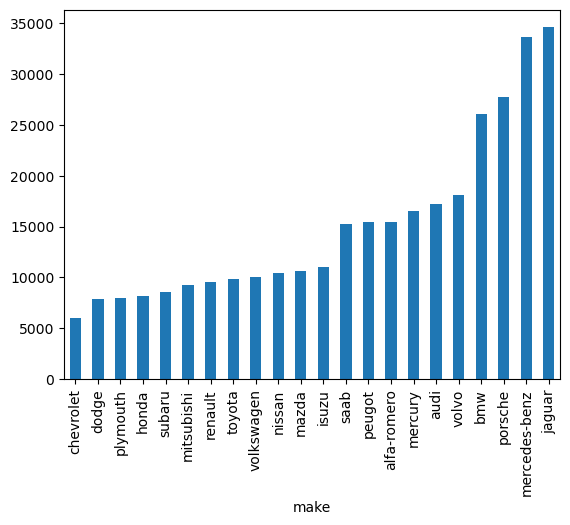

In [72]:
file.groupby("make").mean()["price"].sort_values(ascending=True).plot(kind="bar")

In [73]:
# the average most expensive top 5 cars are: Jaguar, Mercedes, Porsche, Bmw and Volvo

In [74]:
file[file["engine-location"]=="rear"]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
126,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,...,194,mpfi,3.74,2.9,9.5,207.0,5900.0,17,25,32528.0
127,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,...,194,mpfi,3.74,2.9,9.5,207.0,5900.0,17,25,34028.0
128,3,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,...,194,mpfi,3.74,2.9,9.5,207.0,5900.0,17,25,37028.0


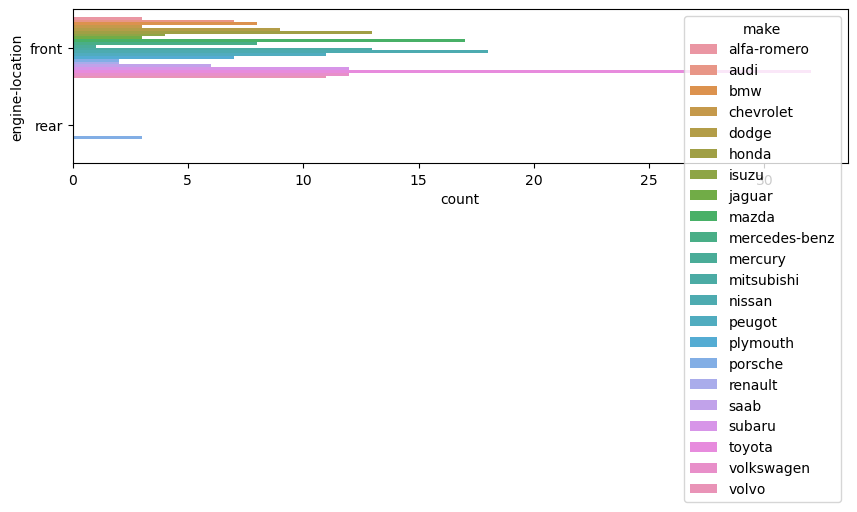

In [75]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y=file['engine-location'], data=file, hue="make");

In [76]:
# only Porsche has the engine located in rear instead of front

<AxesSubplot:xlabel='fuel-type'>

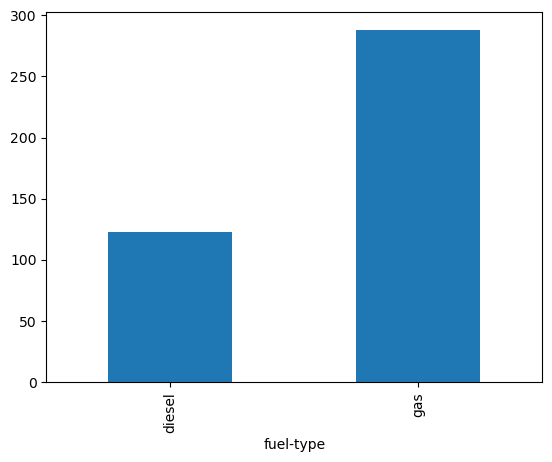

In [77]:
file.groupby("fuel-type")["horsepower"].max().plot(kind="bar")

In [78]:
# we notice that car with gas type have more than double horsepower than diesel

<AxesSubplot:xlabel='body-style'>

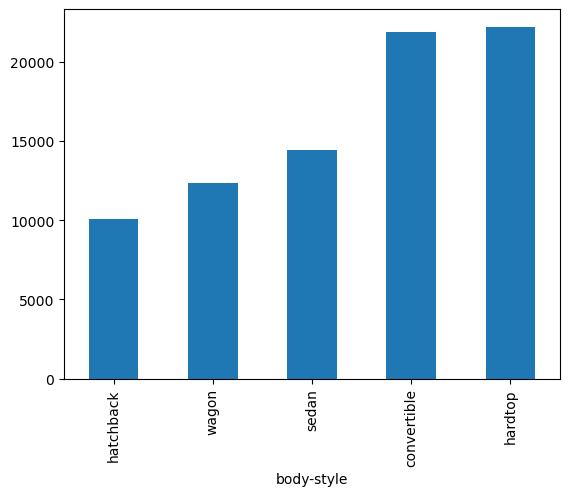

In [79]:
file.groupby("body-style").mean()["price"].sort_values(ascending=True).plot(kind="bar")

In [80]:
# we notice that the body style hardtop and convertible cost more on average

<AxesSubplot:xlabel='wheel-base', ylabel='length'>

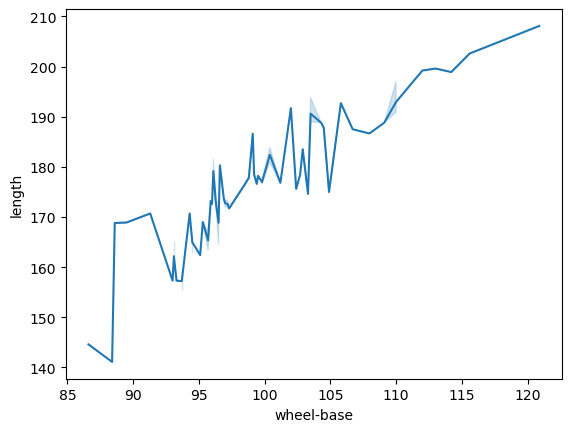

In [81]:
sns.lineplot(data=file,x=file["wheel-base"],y=file["length"])  

In [82]:
# The relashionship between Wheelbase and lenght is directly poportional.
# When wheelbase gets larger, the lenght increases too

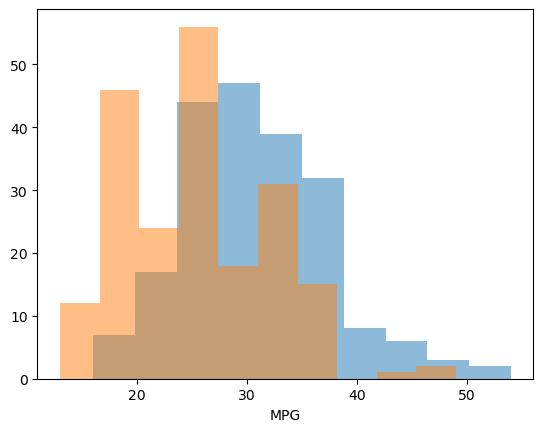

In [83]:
city = file["city-mpg"]
highway = file["highway-mpg"]
values = [city, highway]

plt.figure(1)
plt.hist(highway,bins=10,alpha=0.5,label="Highway")
plt.hist(city,bins=10,alpha=0.5,label="City")

plt.xlabel("MPG")

plt.show()


In [84]:
#City=orange
#Highway= blue
#Is generally more fuel efficient to drive in City

In [85]:
file["engine-size"].value_counts().sort_values(ascending=False).head()

122    15
92     15
97     14
98     14
108    13
Name: engine-size, dtype: int64

<AxesSubplot:ylabel='engine-size'>

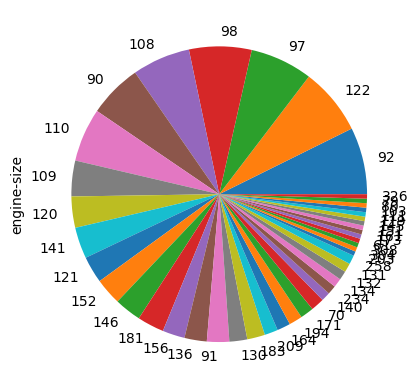

In [86]:
file.groupby("engine-size")["engine-size"].count().sort_values(ascending=False).plot(kind="pie")


In [87]:
# the most common engine sizes are 122,92,97 and 98

In [88]:
# check comparison between horsepower and price. See as well the name of the car
file[["horsepower","price","make"]].sort_values(by="horsepower",ascending=False).head()

,horsepower,price,make
129,288.0,13207.129353,porsche
49,262.0,36000.000000,jaguar
128,207.0,37028.000000,porsche
127,207.0,34028.000000,porsche
126,207.0,32528.000000,porsche


<AxesSubplot:xlabel='horsepower', ylabel='price'>

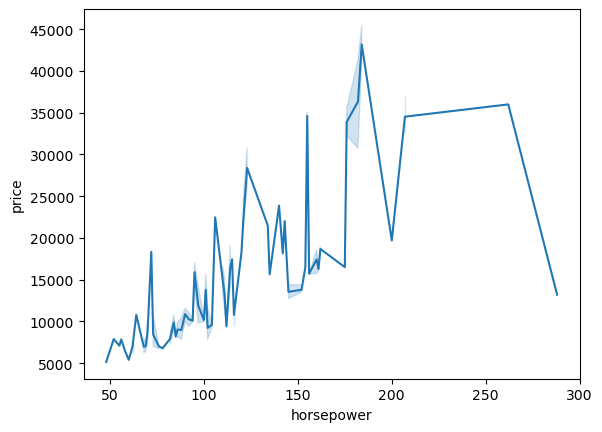

In [89]:
sns.lineplot(data=file,x=file["horsepower"],y=file["price"])

In [90]:
# we can see that horsepower affects the price, but there are some exceptions.
# the car with the most horsepower is a Porsche, however his price is relative cheap 